# Interpretation of the models

📌 Notes

🧠 Why SHAP?

SHAP explains:

How each feature contributes to the final prediction

Which features are most influential for the model globally and locally

Provides transparency for credit models in regulated environments



In [14]:
# Imports
# %pip install shap
import shap
import xgboost
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [15]:
# ✅ Optional: Enable JS visualizations (works in Jupyter Notebook)
shap.initjs()

In [16]:
# 📥 Load Data and Model
X_train = pd.read_csv('../data/X_train.csv')
X_test = pd.read_csv('../data/X_test.csv')

In [17]:
from xgboost import XGBClassifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, pd.read_csv('../data/y_train.csv').values.ravel())

C:\Users\abdou\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [15:01:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [18]:
# 🔍 SHAP Explainer for Tree-Based Model
explainer = shap.Explainer(xgb, X_train)

In [19]:
# Compute SHAP values
shap_values = explainer(X_test)

100%|===================| 9337/9346 [00:15<00:00]        

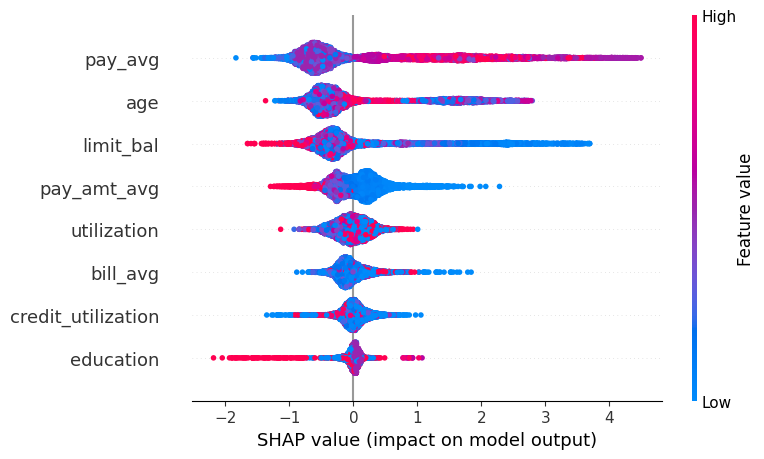

In [20]:
# 📊 SHAP Summary Plot
shap.summary_plot(shap_values, X_test)

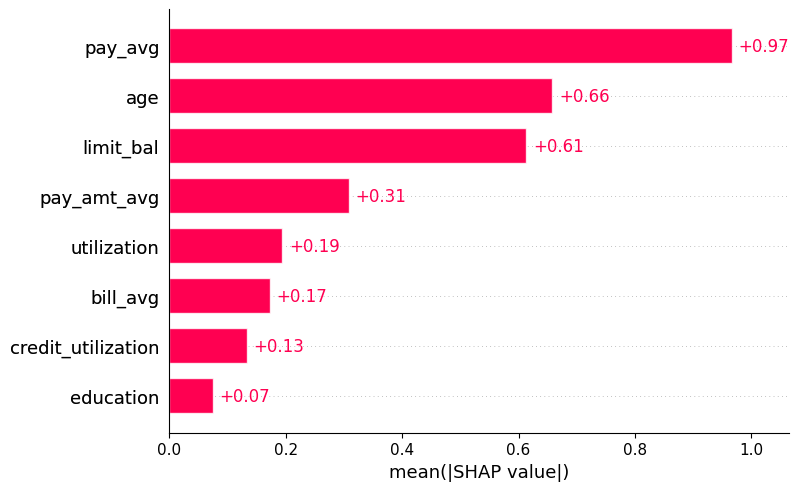

In [21]:
# 📈 SHAP Bar Plot – Mean absolute SHAP values (Feature Importance)
shap.plots.bar(shap_values)

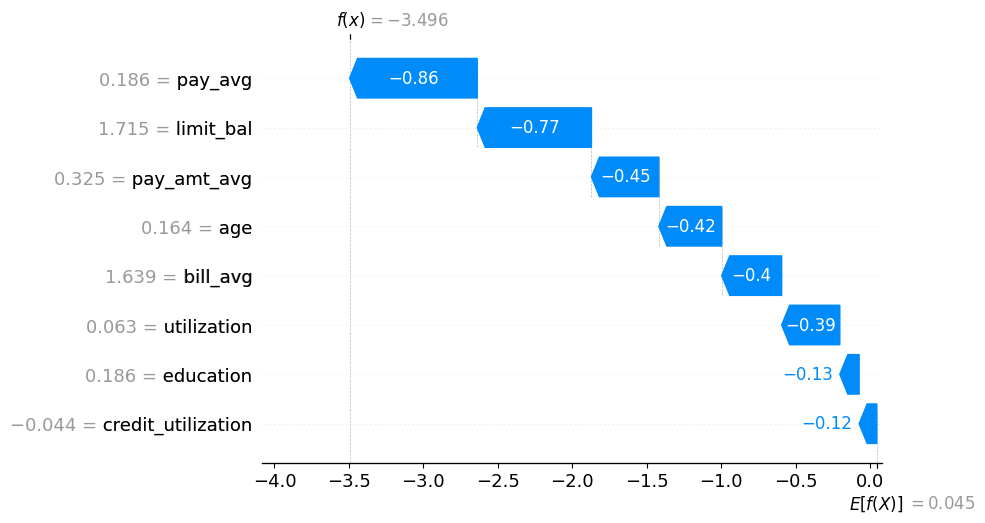

In [22]:
# SHAP Waterfall Plot for One Prediction (optional)
i = 0  # index of the instance to explain
shap.plots.waterfall(shap_values[i])